In [44]:
import numpy as np
from netCDF4 import Dataset as NetCDFFile
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


In [45]:
file_ = 'http://ns9481k.hyrax.sigma2.no/opendap/hyrax/CVLtest/archm_20190719_12.nc'
ice = 'http://ns9481k.hyrax.sigma2.no/opendap/hyrax/CVLtest/iceh.2019-07-19.nc'

ncice = NetCDFFile(ice)
nc = NetCDFFile(file_)
lon = nc.variables['longitude'][:,:]
lat = nc.variables['latitude'][:,:]
ncice = NetCDFFile(ice)

pp = nc.variables['npp'][0,:,:]
pp = pp/1000.
pp_copy = np.copy(pp)

In [46]:
aice  = ncice.variables['aice_d'][0,:,:]
thick = ncice.variables['hi_d'][0,:,:]
pp_copy = np.ma.masked_where(aice < 0.01, pp_copy)

plotted = {}
plotted[0] = {'data':aice, 'max':1., 'title':'Ice area fraction'}
plotted[2] = {'data':thick, 'max':5., 'title':'Ice thickness (m)'}
plotted[1] = {'data':pp_copy, 'max':1., 'title':r'Integrated primary production below ice (gC m$^{-2}$ d$^{-1}$)'}

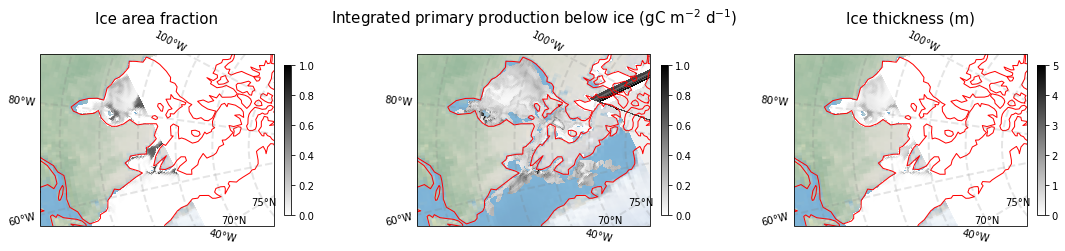

In [47]:
cmap = plt.get_cmap('binary')
from matplotlib import colorbar, colors
import matplotlib.ticker as mticker
figure=plt.figure(figsize=(18,6))
projection=ccrs.Stereographic(80, 20)
for p in range(3):
    ax=figure.add_subplot(1,3,p+1, projection=projection)
    norm = colors.Normalize(vmin=0, vmax=plotted[p]['max'])
    img = ax.pcolormesh(lon, lat, plotted[p]['data'],cmap=cmap, transform=ccrs.PlateCarree(), norm=norm)
    ax.set_extent([-5000000, -1300000, -120000, 2600000],crs=projection)
    ax.coastlines(color='red',resolution='110m')
    ax.stock_img()
    gl = ax.gridlines(transform=projection, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--')
    gl.right_labels = False
    ax.set_title(plotted[p]['title'], fontsize=15)
    figure.colorbar(img, ax=ax,fraction=0.03, pad=0.04)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()